In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the required dataset

In [3]:
rating_df = pd.read_csv('/kaggle/input/movielens-20m-dataset/rating.csv')
movie_df = pd.read_csv('/kaggle/input/movielens-20m-dataset/movie.csv')

In [49]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [50]:
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## EDA on Rating Dataset

In [41]:
print(rating_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB
None


In [42]:
rating_df.shape

(20000263, 4)

In [4]:
rating_df = rating_df.drop_duplicates(subset=['userId', 'movieId'], keep='first')
rating_df.shape

(20000263, 4)

In [5]:
missing_values = rating_df.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


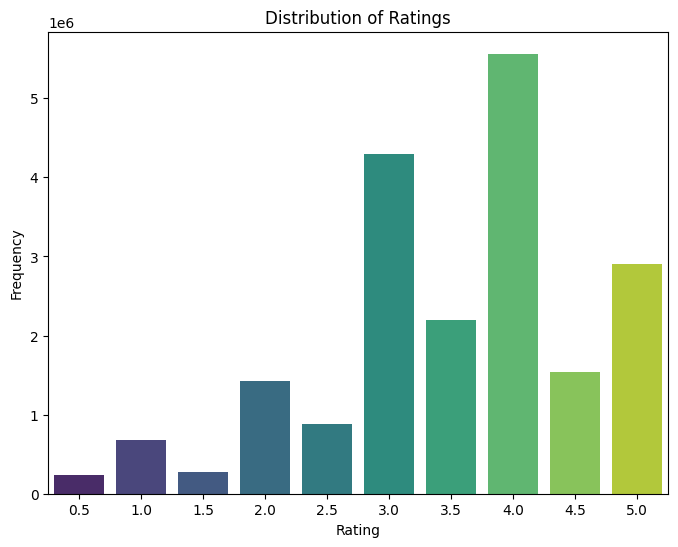

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=rating_df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


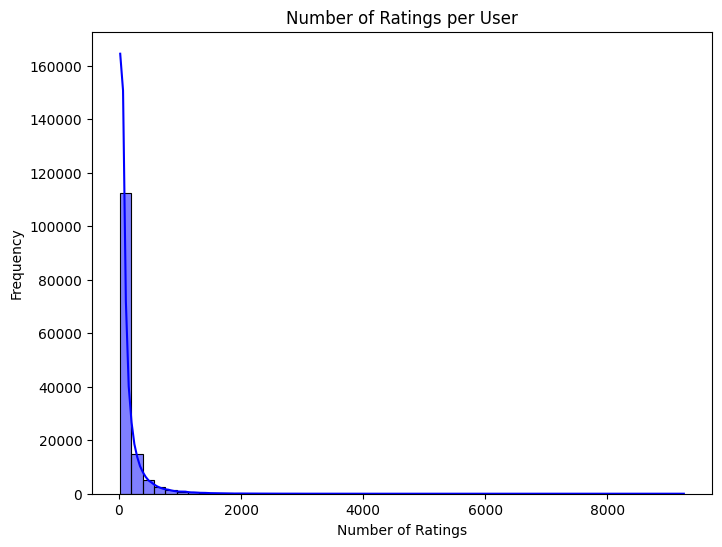

In [14]:
user_ratings_count = rating_df.groupby('userId').size()
plt.figure(figsize=(8, 6))
sns.histplot(user_ratings_count, bins=50, kde=True, color='blue')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


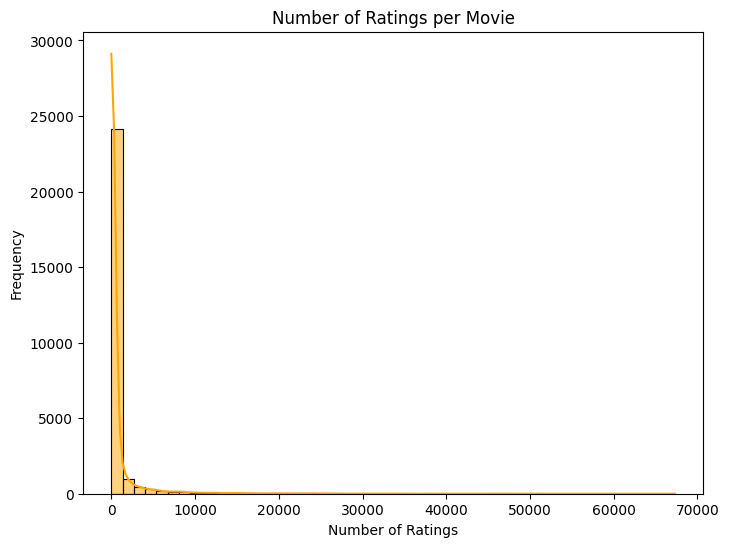

In [15]:
movie_ratings_count = rating_df.groupby('movieId').size()
plt.figure(figsize=(8, 6))
sns.histplot(movie_ratings_count, bins=50, kde=True, color='orange')
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


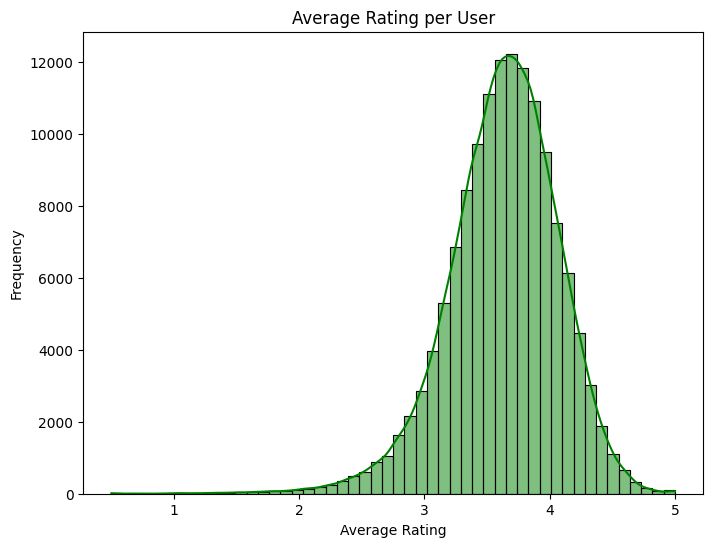

In [16]:
user_avg_rating = rating_df.groupby('userId')['rating'].mean()
plt.figure(figsize=(8, 6))
sns.histplot(user_avg_rating, bins=50, kde=True, color='green')
plt.title('Average Rating per User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


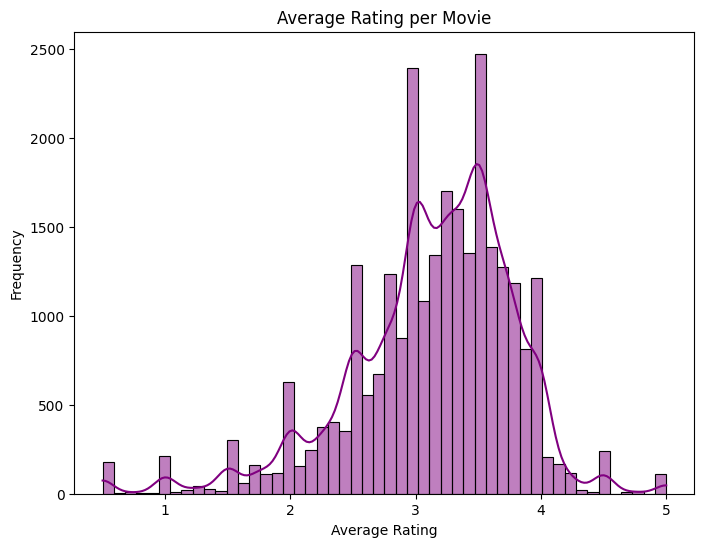

In [17]:
movie_avg_rating = rating_df.groupby('movieId')['rating'].mean()
plt.figure(figsize=(8, 6))
sns.histplot(movie_avg_rating, bins=50, kde=True, color='purple')
plt.title('Average Rating per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

## EDA on movies dataset

In [45]:
print(movie_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB
None


In [6]:
movie_df.shape

(27278, 3)

In [6]:
movie_df = movie_df.drop_duplicates(subset=['title'], keep='first')

In [7]:
import re
movie_df['normalized_title'] = movie_df['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()

duplicate_counts = movie_df['normalized_title'].value_counts()
duplicate_titles = duplicate_counts[duplicate_counts > 1]
print(f"Number of duplicated normalized titles: {len(duplicate_titles)}")

Number of duplicated normalized titles: 891


In [8]:
movie_df = movie_df.drop_duplicates(subset=['normalized_title'], keep='first')
print(f"Number of unique movies after removing duplicates: {movie_df.shape[0]}")

Number of unique movies after removing duplicates: 26213


In [9]:
missing_values_movies = movie_df.isnull().sum()
print(f"Missing values:\n{missing_values_movies}")

Missing values:
movieId             0
title               0
genres              0
normalized_title    0
dtype: int64


In [10]:
# splitting the genres by '|' and calculating the count for each genre
genres = movie_df['genres'].str.split('|', expand=True).stack().value_counts()
print(f"Genres distribution:\n{genres}")


Genres distribution:
Drama                 12771
Comedy                 8144
Thriller               3931
Romance                3920
Action                 3348
Crime                  2804
Horror                 2457
Documentary            2432
Adventure              2199
Sci-Fi                 1666
Mystery                1442
Fantasy                1333
War                    1164
Children               1095
Animation               997
Musical                 990
Western                 651
Film-Noir               309
(no genres listed)      239
IMAX                    184
Name: count, dtype: int64


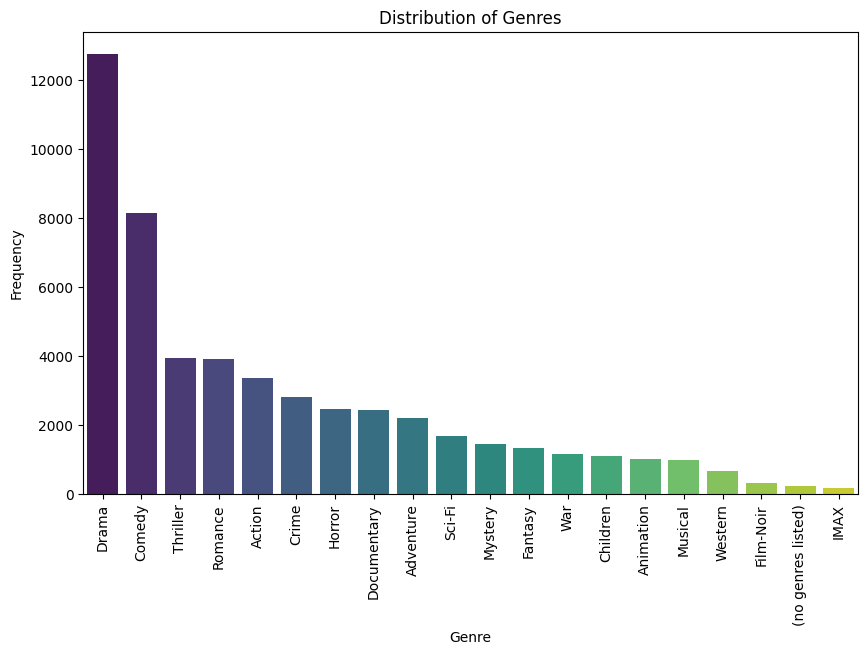

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genres.index, y=genres.values, palette='viridis')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


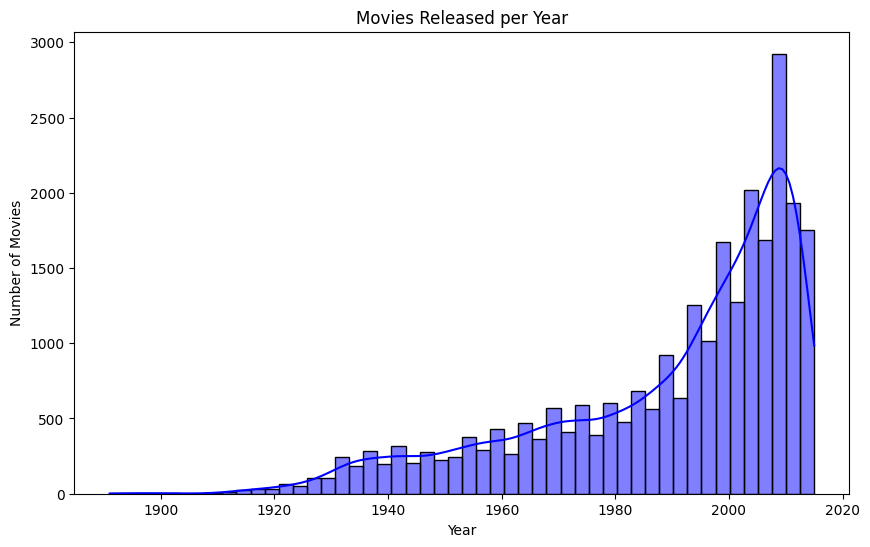

In [26]:
movie_df['year'] = movie_df['title'].str.extract(r'\((\d{4})\)')
movie_df['year'] = pd.to_numeric(movie_df['year'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(movie_df['year'], bins=50, kde=True, color='blue')
plt.title('Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [11]:
title_counts = movie_df['title'].value_counts()
print(f"Most common movie titles:\n{title_counts.head()}")

Most common movie titles:
title
Toy Story (1995)                                                  1
Return of Django (Son of Django) (Figlio di Django, Il) (1968)    1
Margin Call (2011)                                                1
Assassination Games (2011)                                        1
Lentsu (1990)                                                     1
Name: count, dtype: int64


In [12]:
duplicate_titles_count = movie_df['title'].value_counts()
duplicates_summary = duplicate_titles_count[duplicate_titles_count > 1]
print(f"Movies with multiple entries:\n{duplicates_summary}")

Movies with multiple entries:
Series([], Name: count, dtype: int64)


In [12]:
print("Shape of Ratings Dataset: ",rating_df.shape)
print("Shape of Movies Dataset: ",movie_df.shape)

Shape of Ratings Dataset:  (20000263, 4)
Shape of Movies Dataset:  (26213, 4)


In [61]:
def calculate_mode(series):
    return series.mode()[0]  
mode_ratings = movies.groupby(['movieId', 'normalized_title'])['rating'].apply(calculate_mode).reset_index()

mode_ratings.rename(columns={'rating': 'mode_rating'}, inplace=True)

In [62]:
mode_ratings

,movieId,normalized_title,mode_rating
0,1,Toy Story,4.0
1,2,Jumanji,3.0
2,3,Grumpier Old Men,3.0
3,4,Waiting to Exhale,3.0
4,5,Father of the Bride Part II,3.0
...,...,...,...
25710,131252,Forklift Driver Klaus: The First Day on the Job,4.0
25711,131254,Kein Bund für's Leben,4.0
25712,131256,"Feuer, Eis & Dosenbier",4.0
25713,131258,The Pirates,2.5


In [63]:
mode_ratings['normalized_title'].value_counts()

normalized_title
Toy Story                   1
Hesher                      1
Bill Cunningham New York    1
Colombiana                  1
Great White Silence, The    1
                           ..
Traffic (Trafic)            1
Slither                     1
Payday                      1
Lady Sings the Blues        1
Rentun Ruusu                1
Name: count, Length: 25715, dtype: int64

In [64]:
duplicates = mode_ratings[mode_ratings.duplicated()]


print("Number of duplicate rows:", duplicates.shape[0])
if not duplicates.empty:
    print(duplicates)

Number of duplicate rows: 0


In [65]:
mode_ratings.isna().sum()

movieId             0
normalized_title    0
mode_rating         0
dtype: int64

mode_rating
0.5     949
1.0     887
1.5     548
2.0    1626
2.5    1940
3.0    8115
3.5    3949
4.0    6867
4.5     410
5.0     424
Name: count, dtype: int64


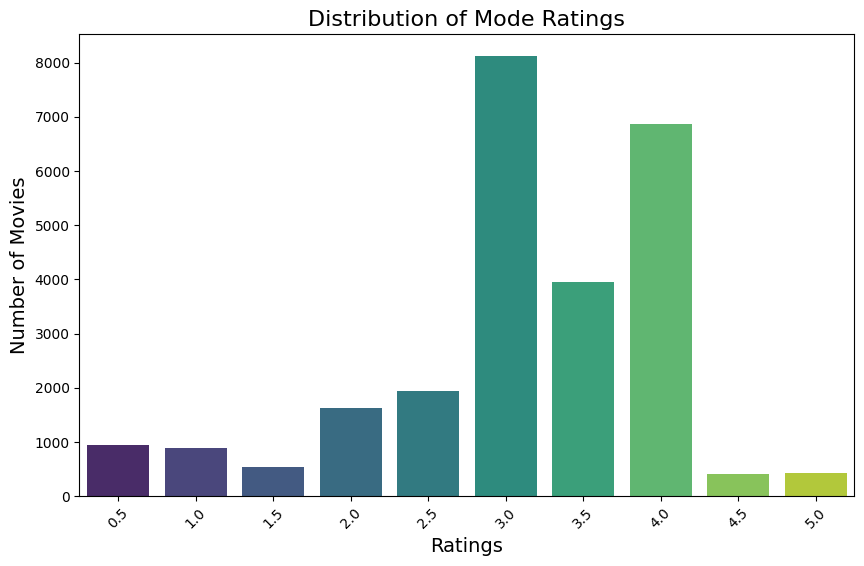

In [66]:
rating_counts = mode_ratings['mode_rating'].value_counts().sort_index()
print(rating_counts)


plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title("Distribution of Mode Ratings", fontsize=16)
plt.xlabel("Ratings", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.xticks(rotation=45)
plt.show()

## Simplifying the data

In [14]:
movies = movie_df.merge(rating_df,on='movieId')

In [15]:
movies.head(5)

,movieId,title,genres,normalized_title,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,11,4.5,2009-01-02 01:13:41


## Data Preprocessing

In [16]:

movies['genres'] = movies['genres'].str.split('|')

In [17]:
movies

,movieId,title,genres,normalized_title,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,11,4.5,2009-01-02 01:13:41
...,...,...,...,...,...,...,...
19667873,131252,Forklift Driver Klaus: The First Day on the Jo...,"[Comedy, Horror]",Forklift Driver Klaus: The First Day on the Job,79570,4.0,2015-03-30 19:20:55
19667874,131254,Kein Bund für's Leben (2007),[Comedy],Kein Bund für's Leben,79570,4.0,2015-03-30 19:32:59
19667875,131256,"Feuer, Eis & Dosenbier (2002)",[Comedy],"Feuer, Eis & Dosenbier",79570,4.0,2015-03-30 19:48:08
19667876,131258,The Pirates (2014),[Adventure],The Pirates,28906,2.5,2015-03-30 19:56:32


In [18]:
movies = movies[['movieId','normalized_title','rating','genres']]


In [19]:
movies.loc[:, 'genres'] = movies['genres'].apply(lambda x: '|'.join(sorted(x)) if isinstance(x, list) else x)


In [20]:
movies

,movieId,normalized_title,rating,genres
0,1,Toy Story,4.0,Adventure|Animation|Children|Comedy|Fantasy
1,1,Toy Story,5.0,Adventure|Animation|Children|Comedy|Fantasy
2,1,Toy Story,4.0,Adventure|Animation|Children|Comedy|Fantasy
3,1,Toy Story,4.0,Adventure|Animation|Children|Comedy|Fantasy
4,1,Toy Story,4.5,Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...
19667873,131252,Forklift Driver Klaus: The First Day on the Job,4.0,Comedy|Horror
19667874,131254,Kein Bund für's Leben,4.0,Comedy
19667875,131256,"Feuer, Eis & Dosenbier",4.0,Comedy
19667876,131258,The Pirates,2.5,Adventure


In [21]:
def calculate_mode(series):
    mode_values = series.mode()
    return mode_values[0] if not mode_values.empty else None  # Handle empty modes


In [22]:
movies['genres']

0           Adventure|Animation|Children|Comedy|Fantasy
1           Adventure|Animation|Children|Comedy|Fantasy
2           Adventure|Animation|Children|Comedy|Fantasy
3           Adventure|Animation|Children|Comedy|Fantasy
4           Adventure|Animation|Children|Comedy|Fantasy
                               ...                     
19667873                                  Comedy|Horror
19667874                                         Comedy
19667875                                         Comedy
19667876                                      Adventure
19667877                             (no genres listed)
Name: genres, Length: 19667878, dtype: object

In [23]:
mode_ratings = movies.groupby('movieId')['rating'].apply(calculate_mode).reset_index()

mode_ratings.rename(columns={'rating': 'mode_rating'}, inplace=True)

unique_movies = movies[['movieId', 'normalized_title', 'genres']].drop_duplicates()

movies_with_mode = unique_movies.merge(mode_ratings, on='movieId', how='left')


In [24]:
movies_with_mode

,movieId,normalized_title,genres,mode_rating
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,4.0
1,2,Jumanji,Adventure|Children|Fantasy,3.0
2,3,Grumpier Old Men,Comedy|Romance,3.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,3.0
4,5,Father of the Bride Part II,Comedy,3.0
...,...,...,...,...
25710,131252,Forklift Driver Klaus: The First Day on the Job,Comedy|Horror,4.0
25711,131254,Kein Bund für's Leben,Comedy,4.0
25712,131256,"Feuer, Eis & Dosenbier",Comedy,4.0
25713,131258,The Pirates,Adventure,2.5


In [25]:
movies_with_mode.to_csv('movies_with_mode.csv', index=False)

## Model Building

- Step 1:Reconstruct the User-Movie Matrix
You need user ratings to align with the mode_ratings dataset.

In [3]:
movies_with_mode

,movieId,normalized_title,genres,mode_rating
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,4.0
1,2,Jumanji,Adventure|Children|Fantasy,3.0
2,3,Grumpier Old Men,Comedy|Romance,3.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,3.0
4,5,Father of the Bride Part II,Comedy,3.0
...,...,...,...,...
25710,131252,Forklift Driver Klaus: The First Day on the Job,Comedy|Horror,4.0
25711,131254,Kein Bund für's Leben,Comedy,4.0
25712,131256,"Feuer, Eis & Dosenbier",Comedy,4.0
25713,131258,The Pirates,Adventure,2.5


In [4]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
from fuzzywuzzy import process
from sklearn.preprocessing import MinMaxScaler


movies_with_mode['genres_list'] = movies_with_mode['genres'].str.split('|')
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(movies_with_mode['genres_list'])


genre_df = pd.DataFrame(genre_matrix, columns=mlb.classes_, index=movies_with_mode['movieId'])

cosine_sim = cosine_similarity(genre_df)
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies_with_mode['movieId'], columns=movies_with_mode['movieId'])

def recommend_movies(user_input, user_rating, cosine_sim_df, movies_with_mode, top_k=5):
    exact_genre_movies = movies_with_mode[movies_with_mode['genres'].str.contains(user_input, case=False, na=False)]
    exact_title_match = movies_with_mode[movies_with_mode['normalized_title'].str.lower() == user_input.lower()]

    if not exact_title_match.empty:  
        movie_id = exact_title_match.iloc[0]['movieId']
        similar_movies = cosine_sim_df[movie_id].sort_values(ascending=False).iloc[1:top_k + 1]
    elif not exact_genre_movies.empty:  
        movie_ids = exact_genre_movies['movieId'].values
        genre_similarities = cosine_sim_df.loc[movie_ids].mean(axis=0).sort_values(ascending=False)
        similar_movies = genre_similarities.iloc[:top_k]
    else:  
        genre_match = process.extractOne(user_input, '|'.join(movies_with_mode['genres'].unique()).split('|'))
        if genre_match and genre_match[1] > 80:
            matched_genre = genre_match[0]
            fuzzy_genre_movies = movies_with_mode[movies_with_mode['genres'].str.contains(matched_genre)]
            movie_ids = fuzzy_genre_movies['movieId'].values
            genre_similarities = cosine_sim_df.loc[movie_ids].mean(axis=0).sort_values(ascending=False)
            similar_movies = genre_similarities.iloc[:top_k]
        else:
            print("Sorry, we couldn't find the movie or genre. Please check your input.")
            return pd.DataFrame()

    
    recommended_movies = movies_with_mode[movies_with_mode['movieId'].isin(similar_movies.index)].copy()

    
    print(f"\nRecommended Movies based on your input '{user_input}' (Genre/Name) with rating '{user_rating}':")
    print(recommended_movies[['normalized_title', 'genres']])
    return recommended_movies

In [33]:
def predict_rating_for_unseen(user_rating, unseen_movie_name, unseen_movie_genre, cosine_sim_df, mode_ratings, movies_with_mode, top_k=5):
    """
    Predict the rating for an unseen movie based on the genre and user rating, 
    using the mode ratings of similar movies and movie recommendations based on the genre.
    """
    
    recommended_movies = recommend_movies(unseen_movie_genre, user_rating, cosine_sim_df, movies_with_mode, top_k=top_k)
    
    if recommended_movies.empty:
        print("Sorry, no recommendations found based on the provided genre.")
        return None

    
    recommended_movie_ids = recommended_movies['movieId'].values

    
    genre_similarities = cosine_sim_df.loc[recommended_movie_ids].mean(axis=0).sort_values(ascending=False)
    
    
    similar_movies = genre_similarities.iloc[1:top_k+1]

    
    predicted_ratings = []
    for movie_id in similar_movies.index:
        
        mode_rating = mode_ratings[mode_ratings['movieId'] == movie_id].mode_rating.values[0]
        
        # Combine the user's rating and the mode rating of the similar movie to predict the rating
        predicted_rating = (user_rating + mode_rating) / 2
        predicted_ratings.append(predicted_rating)

    
    predicted_movies = movies_with_mode[movies_with_mode['movieId'].isin(similar_movies.index)].copy()
    
    
    predicted_movies['predicted_rating'] = predicted_ratings

    
    print(f"\nPredicted Rating for '{unseen_movie_name}': {predicted_ratings[0]:.2f}")

    return predicted_movies


In [22]:
def main():
    print("Welcome to the Movie Recommendation System!")
    
    
    user_input = input("Enter a movie name or genre: ")
    user_rating = float(input("Enter your rating for the movie/genre: "))
    
    
    recommended_movies = recommend_movies(user_input, user_rating, cosine_sim_df, movies_with_mode)
    
    if not recommended_movies.empty:
        
        predict_rating = input("Would you like to predict the rating for an unseen movie? (yes/no): ").lower()
        
        if predict_rating == 'yes':
            
            unseen_movie_name = input("Enter the name of the unseen movie: ")
            unseen_movie_genre = input("Enter the genre of the unseen movie: ")
            unseen_movie_rating = float(input(f"Please provide your rating for the unseen movie '{unseen_movie_name}': "))
            
            
            predicted_movies = predict_rating_for_unseen(user_rating=unseen_movie_rating,
                                                         unseen_movie_name=unseen_movie_name,
                                                         unseen_movie_genre=unseen_movie_genre,
                                                         cosine_sim_df=cosine_sim_df,
                                                         mode_ratings=movies_with_mode[['movieId', 'mode_rating']],
                                                         movies_with_mode=movies_with_mode, top_k=5)
            
            if predicted_movies is not None:
                predicted_rating = predicted_movies['predicted_rating'].iloc[0]  
                print(f"\nPredicted Rating for '{unseen_movie_name}': {predicted_rating:.2f}")
        else:
            print("Thank you for using the Movie Recommendation System!")
    else:
        print("Sorry, we couldn't find the movie or genre. Please check your input.")
        print("Thank you for using the Movie Recommendation System!")


main()


Welcome to the Movie Recommendation System!


Enter a movie name or genre:  Drama|Thriller|Action
Enter your rating for the movie/genre:  3.5



Recommended Movies based on your input 'Drama|Thriller|Action' (Genre/Name) with rating '3.5':
                                        normalized_title  \
860              Supercop 2 (Project S) (Chao ji ji hua)   
3589                                      Action Jackson   
3897   Nowhere to Hide (Injeong sajeong bol geot eobtda)   
6404                 Remo Williams: The Adventure Begins   
23687                                           Crackers   

                             genres  
860    Action|Comedy|Crime|Thriller  
3589   Action|Comedy|Crime|Thriller  
3897   Action|Comedy|Crime|Thriller  
6404   Action|Comedy|Crime|Thriller  
23687  Action|Comedy|Crime|Thriller  


Would you like to predict the rating for an unseen movie? (yes/no):  yes
Enter the name of the unseen movie:  Sholay
Enter the genre of the unseen movie:  Action}Musical
Please provide your rating for the unseen movie 'Sholay':  5



Recommended Movies based on your input 'Action}Musical' (Genre/Name) with rating '5.0':
            normalized_title      genres
3023         Sea Wolves, The  Action|War
3257  Bridge at Remagen, The  Action|War
4220          Uncommon Valor  Action|War
4230       Too Late the Hero  Action|War
5806          Duellists, The  Action|War

Predicted Rating for 'Sholay': 4.50

Predicted Rating for 'Sholay': 4.50


In [45]:
import joblib

# Save the model components
joblib.dump(cosine_sim_df, 'cosine_similarity_matrix.pkl')  
joblib.dump(mlb, 'genre_binarizer.pkl')

['genre_binarizer.pkl']